In [20]:
import seaborn as sns
import matplotlib
sns.set(style="darkgrid")

data = sns.load_dataset("tips").loc[:, ["total_bill", "tip", "total_bill"]]
data.columns = ['x', 'y', 'z']

In [25]:
def plot_joint_plot(data):
    # create a cmap and color for each datpoint according to the z value.
    cmap = matplotlib.cm.get_cmap('viridis')
    normalize = matplotlib.colors.Normalize(vmin=data.z.min(), vmax=data.z.max())
    colors = [cmap(normalize(value)) for value in data.z]

    g = sns.jointplot("x", "y", data=data, kind="reg", stat_func=None,
                      xlim=(0, 60), ylim=(0, 12), color='k', size=7)

    #Clear the axes containing the scatter plot
    g.ax_joint.cla()

    #Plot each individual point separately
    for i,row in enumerate(data.values):
        g.ax_joint.plot(row[0], row[1], color=colors[i], marker="o", alpha=0.2)

    g.set_axis_labels('total bill', 'tip', fontsize=16)

    cax, _ = matplotlib.colorbar.make_axes(g.fig.axes[2])
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    cbar.ax.set_xlabel('          Z value', rotation=0)

    # plt.show()

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


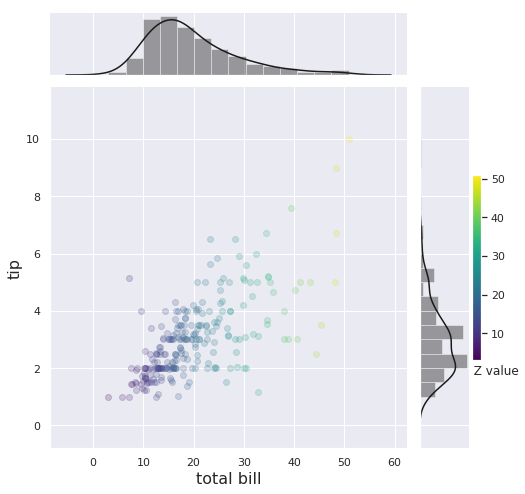

In [26]:
plot_joint_plot(data)